## 6.6 动量法
小批量梯度下降法从训练样本的使用角度改善了随机梯度下降法的效果。但在追求极致的优化算法道路上，科学家们远未停止前进的步伐。他们不停的找问题，想新思路，进一步改善算法性能。前面三种算法都使用了梯度计算，能不能从这里入手改变呢。真有人就这么干了，而且效果不错。这就是本节要介绍的动量法了。

### 6.6.1 基本思想

动量法是一种在深度学习中使用的优化方法，核心思想是让模型的更新更加平稳，从而使学习更加顺畅。具体来说，动量法通过将当前的梯度信息与上一步的梯度信息进行加权平均来减少梯度的震荡。这可以通过使用动量因子 $\beta$ 来实现。给定一个参数 $\theta$ 和当前的梯度 $\nabla_\theta J(\theta)$，我们可以使用动量法来更新 $\theta$，公式如下：

$$v_t = \beta v_{t-1} + (1-\beta)\nabla_\theta J(\theta)$$
$$\theta = \theta - \alpha v_t$$

其中，$\alpha$ 是学习率，$v_t$ 是梯度的动量，$\beta$ 是动量因子。在每一步中，我们将当前的梯度与上一步的梯度加权平均起来，并使用这个平均值来更新参数。当 $\beta$ 很大时，动量较大，这意味着梯度更多地“记住”之前的信息，因此梯度的波动会减少。

### 6.6.2 优缺点

先说优点：
- 动量法可以帮助算法在局部最优解附近更快地收敛。这是因为动量法可以帮助算法“跳过”局部最小值，它可以保持一定的加速度，使算法能够跨越那些低点。
- 可以减少学习率的需求。因为动量法可以帮助算法跳过局部最小值，所以我们不需要设置过大的学习率来更快地收敛。这可以减少学习率过大导致的振荡的风险。
- 可以帮助算法更快地从平凡的初始权重开始收敛。这是因为动量法可以帮助算法跳过局部最小值，因此算法可以更快地从平凡的初始权重开始收敛。

缺点方面：
- 动量法可能会使算法“超调”。如果我们设置的动量因子 $\beta$ 过大，那么动量就会变得过大，这可能会导致算法“超调”。

### 6.6.3 发展历史

动量法是由深度学习先驱 Geoffrey Hinton 在 1986 年提出的。在当时，他提出了一种名为“快速动量法”的优化方法，用于解决深度神经网络训练过程中的梯度消失问题。在 1990 年代，动量法得到了广泛应用，并在许多研究中得到了证明。在 2000 年代，动量法在深度学习中得到了广泛应用，并成为了许多深度学习框架的默认优化方法。近年来，动量法也在不断发展，人们提出了许多改进版本，比如 Nesterov 动量法，AdaGrad 动量法等。这些改进版本在某些情况下表现得更好，因此也得到了广泛使用。

### 6.6.4 代码示例

在 PyTorch 中，你可以使用 torch.optim 库中的 SGD 类来实现动量法。下面是一个简单的例子，展示了如何使用动量法来优化一个简单的神经网络,我们同时对比了不使用动量法的情况。

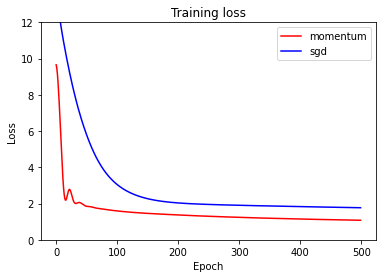

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

# 定义模型和损失函数
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1, 32)
        self.hidden2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return self.output(x)
loss_fn = nn.MSELoss()

# 生成随机数据
np.random.seed(0)
n_samples = 200
x = np.linspace(-5, 5, n_samples)
y = 0.3 * (x ** 2) + np.random.randn(n_samples)

# 转换为Tensor
x = torch.unsqueeze(torch.from_numpy(x).float(), 1)
y = torch.unsqueeze(torch.from_numpy(y).float(), 1)

names = ["momentum", "sgd"] # 一个使用动量法，一个不使用
losses = [[], []]

# 超参数
learning_rate = 0.0005
n_epochs = 500

# 分别训练
for i in range(len(names)):
    model = Model()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9 if i == 0 else 0) # 一个使用动量法，一个不使用
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        losses[i].append(loss.item())

# 绘制损失值的变化趋势
plt.figure()
plt.plot(losses[0], 'r-', label='momentum')
plt.plot(losses[1], 'b-', label='sgd')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.ylim((0, 12))
plt.legend()
plt.show()

在上述代码中，我们使用了 torch.optim.SGD 类来实现动量法。我们传入了网络的参数以及学习率和动量参数，然后在训练循环中调用 optimizer.step() 来更新参数。通常来说，使用动量法可以帮助优化算法更快地收敛到最优解。它通过给梯度添加一个“动量”来帮助优化算法更快地摆脱局部最优解，并最终收敛到全局最优解。但是要注意，动量法仅仅是在某些情况下可以比其他优化算法更快地收敛，可以让你的训练更快地完成。换句话说，仅仅使用动量法并不能保证优于其他算法。动量法通过维护上一次更新的加速度来减少梯度下降时的震荡，但这同样需要适当的学习率。如果学习率过小，那么即使使用动量法也会出现震荡，因为学习率过小会导致更新过慢。上面的例子就可能出现这种情况。你可以尝试调整不同的参数改善不同方法的效果。

**梗直哥提示：上面例子暴露的问题也显示了对深度学习算法而言，仅仅知道原理的皮毛是不够的，还要深刻领会其中的思想，掌握调参的经验，才能无往不胜。再好的模型，也得看会不会用，用的是不是地方。这就如同武器一样，光靠它不行，还要看手拿武器的人能不能把它用好。如果你对这方面的故事和经验体会感兴趣，希望进阶学习，欢迎来到我的课堂（微信：gengzhige99）。**

[Next 6-7 AdaGrad算法](./6-7%20AdaGrad算法.ipynb)